In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv("cleaned_dataset1.csv")
except FileNotFoundError:
    print("File not found.")
    exit()

print("Overall Description of Capital Gain and Loss:")
print(df[['Capital_Gain', 'Capital_Loss']].describe())

Overall Description of Capital Gain and Loss:
       Capital_Gain  Capital_Loss
count  48842.000000  48842.000000
mean    1079.067626     87.502314
std     7452.019058    403.004552
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max    99999.000000   4356.000000


In [3]:
print("Description of Non-Zero Capital Gain:")
print(df[df['Capital_Gain'] > 0]['Capital_Gain'].describe())

Description of Non-Zero Capital Gain:
count     4035.000000
mean     13061.665675
std      22711.237412
min        114.000000
25%       3411.000000
50%       7298.000000
75%      13550.000000
max      99999.000000
Name: Capital_Gain, dtype: float64


In [4]:
print("Description of Non-Zero Capital Loss:")
print(df[df['Capital_Loss'] > 0]['Capital_Loss'].describe())

Description of Non-Zero Capital Loss:
count    2282.000000
mean     1872.825592
std       364.048529
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: Capital_Loss, dtype: float64


In [5]:
df['Has_Capital_Activity'] = (df['Capital_Gain'] > 0) | (df['Capital_Loss'] > 0)
proportion_with_activity = df['Has_Capital_Activity'].mean()
print(f"Proportion of individuals with any capital activity: {proportion_with_activity:.2%}")

Proportion of individuals with any capital activity: 12.93%


# 1. Education Distribution & Grouping

**Identify the unique education levels and their frequencies. Group them into broader, meaningful
categories (e.g., elementary, higher education, etc.). Explain the reasoning behind your mapping
and support your answer with visual evidence.**

In [6]:
education_counts = df['Education'].value_counts()

print("--- Unique Education Levels and Frequencies ---")
print(education_counts)

--- Unique Education Levels and Frequencies ---
Education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


In [7]:
education_map = {
    'Preschool': 'Compulsory Education',
    '1st-4th': 'Compulsory Education',
    '5th-6th': 'Compulsory Education',
    '7th-8th': 'Compulsory Education',
    '9th': 'Compulsory Education',
    '10th': 'Compulsory Education',
    '11th': 'Compulsory Education',
    '12th': 'Compulsory Education',
    'HS-grad': 'High School',
    'Some-college': 'Some College',
    'Assoc-voc': 'Associate',
    'Assoc-acdm': 'Associate',
    'Bachelors': 'Bachelors',
    'Masters': 'Advanced Degree',
    'Prof-school': 'Advanced Degree',
    'Doctorate': 'Advanced Degree'
}

df['Education_Group'] = df['Education'].map(education_map)

print("\n--- Frequencies of the new Education Groups ---")
print(df['Education_Group'].value_counts())


--- Frequencies of the new Education Groups ---
Education_Group
High School             15784
Some College            10878
Bachelors                8025
Compulsory Education     6408
Advanced Degree          4085
Associate                3662
Name: count, dtype: int64


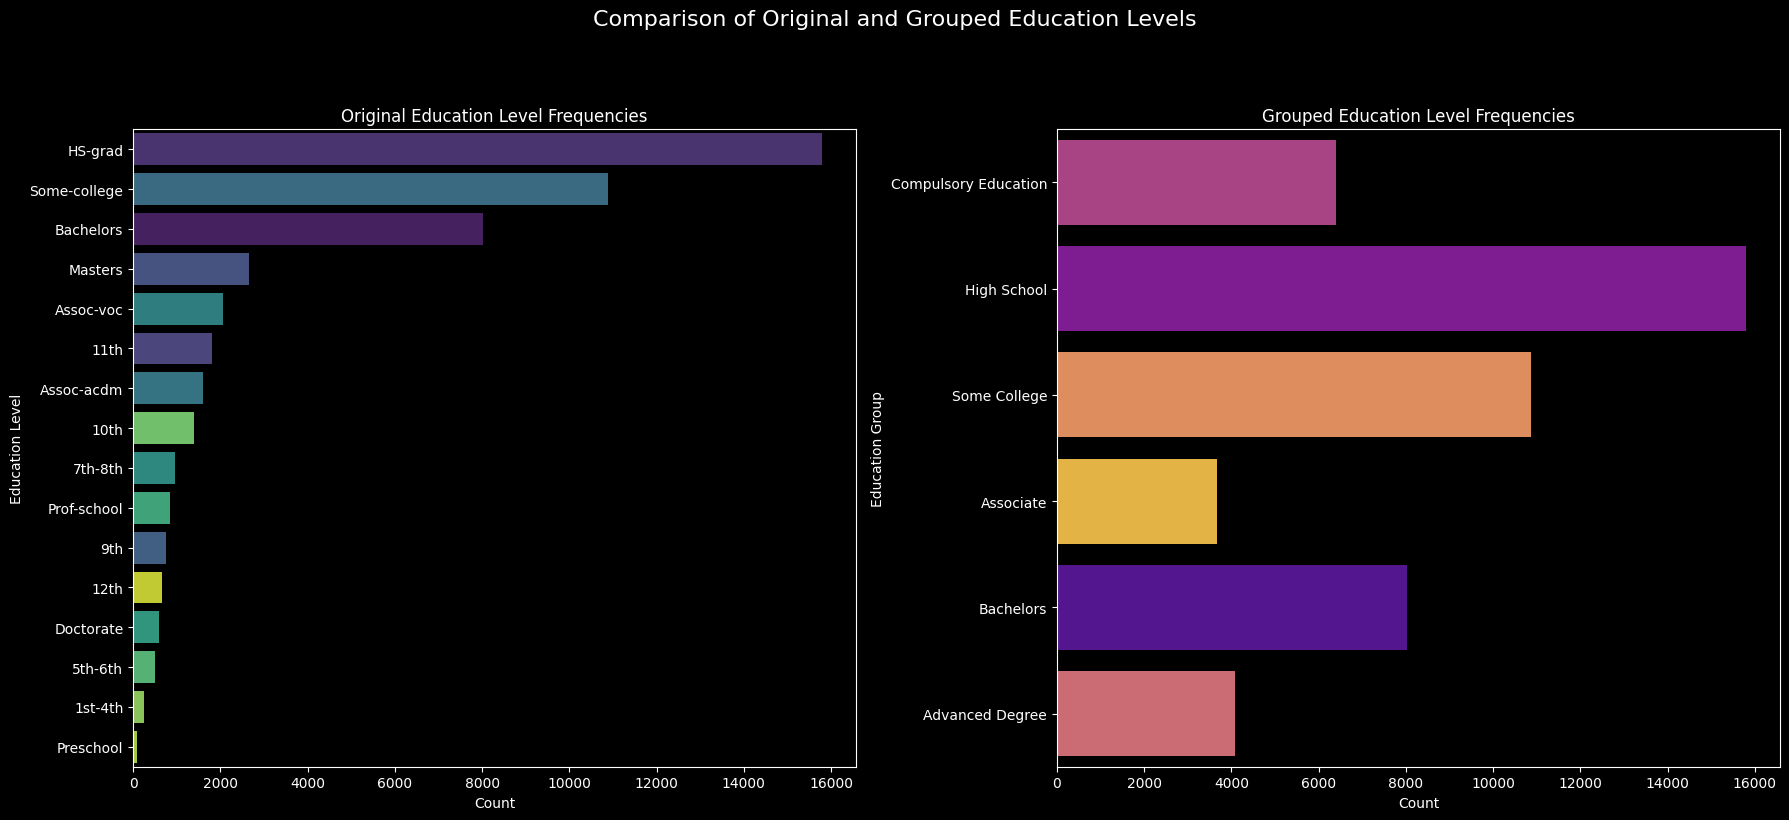

In [8]:
plt.figure(figsize=(18, 8))
plt.suptitle('Comparison of Original and Grouped Education Levels', fontsize=16, y=1.02)

# Original Education Distribution ---
plt.subplot(1, 2, 1)
sns.countplot(y='Education', data=df, order=education_counts.index, palette='viridis', hue='Education', legend=False)
plt.title('Original Education Level Frequencies')
plt.xlabel('Count')
plt.ylabel('Education Level')

# Grouped Education Distribution ---
plt.subplot(1, 2, 2)
# Define a logical order for the grouped categories
group_order = [
    'Compulsory Education', 'High School', 'Some College', 
    'Associate', 'Bachelors', 'Advanced Degree'
]

sns.countplot(y='Education_Group', data=df, order=group_order, palette='plasma', hue='Education_Group', legend=False)
plt.title('Grouped Education Level Frequencies')
plt.xlabel('Count')
plt.ylabel('Education Group')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- The original `Education` feature contains 16 categories, and most of them have small, infrequent counts.
- The new `Education_Group` reduces this complexity by consolidating these categories into broader groups making it more interpretable.
- The new `Education_Group` has a more ordered progression from least to most education.

# 2. Age–Work Intensity Relationship and Grouping

**Examine the distributions of age and hours worked per week. Create broader groups for each
variable (e.g., part-time, full-time, overtime for work intensity) and compare category counts
and distributions before and after grouping. Analyse the relationship between age and work
intensity before and after grouping. Comment on whether grouping improves interpretability
or reduces useful detail, supported by statistical evidence and visualisations.**

--- Descriptive Statistics for Age and Hours per Week ---
                Age  Hours_per_week
count  48842.000000    48842.000000
mean      38.643585       40.422382
std       13.710510       12.391444
min       17.000000        1.000000
25%       28.000000       40.000000
50%       37.000000       40.000000
75%       48.000000       45.000000
max       90.000000       99.000000


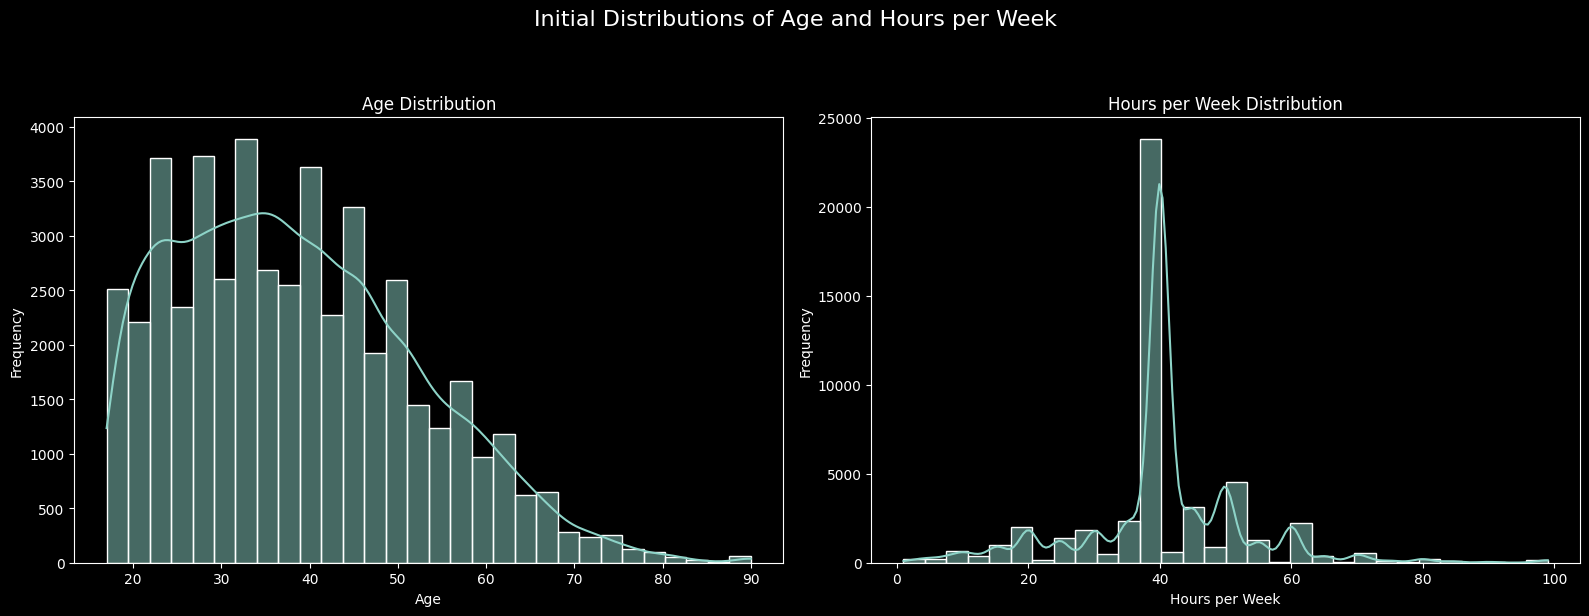

In [9]:
print("--- Descriptive Statistics for Age and Hours per Week ---")
print(df[['Age', 'Hours_per_week']].describe())

plt.figure(figsize=(16, 6))
plt.suptitle('Initial Distributions of Age and Hours per Week', fontsize=16, y=1.02)

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Hours_per_week'], kde=True, bins=30)
plt.title('Hours per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [10]:
age_bins = [16, 30, 45, 60, 100]
age_labels = ['Young Adult (17-30)', 'Middle-Aged (31-45)', 'Senior Adult (46-60)', 'Elderly (61+)']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

work_bins = [0, 39, 40, 50, 100]
work_labels = ['Part-Time (<40)', 'Full-Time (40)', 'Overtime (41-50)', 'High-Intensity (>50)']
df['Work_Intensity'] = pd.cut(df['Hours_per_week'], bins=work_bins, labels=work_labels, right=True)

print("--- Value Counts for New Groups ---")
print("\nAge Group Counts:")
print(df['Age_Group'].value_counts().sort_index())
print("\nWork Intensity Counts:")
print(df['Work_Intensity'].value_counts().sort_index())

--- Value Counts for New Groups ---

Age Group Counts:
Age_Group
Young Adult (17-30)     15793
Middle-Aged (31-45)     18505
Senior Adult (46-60)    10938
Elderly (61+)            3606
Name: count, dtype: int64

Work Intensity Counts:
Work_Intensity
Part-Time (<40)         11687
Full-Time (40)          22803
Overtime (41-50)         8917
High-Intensity (>50)     5435
Name: count, dtype: int64


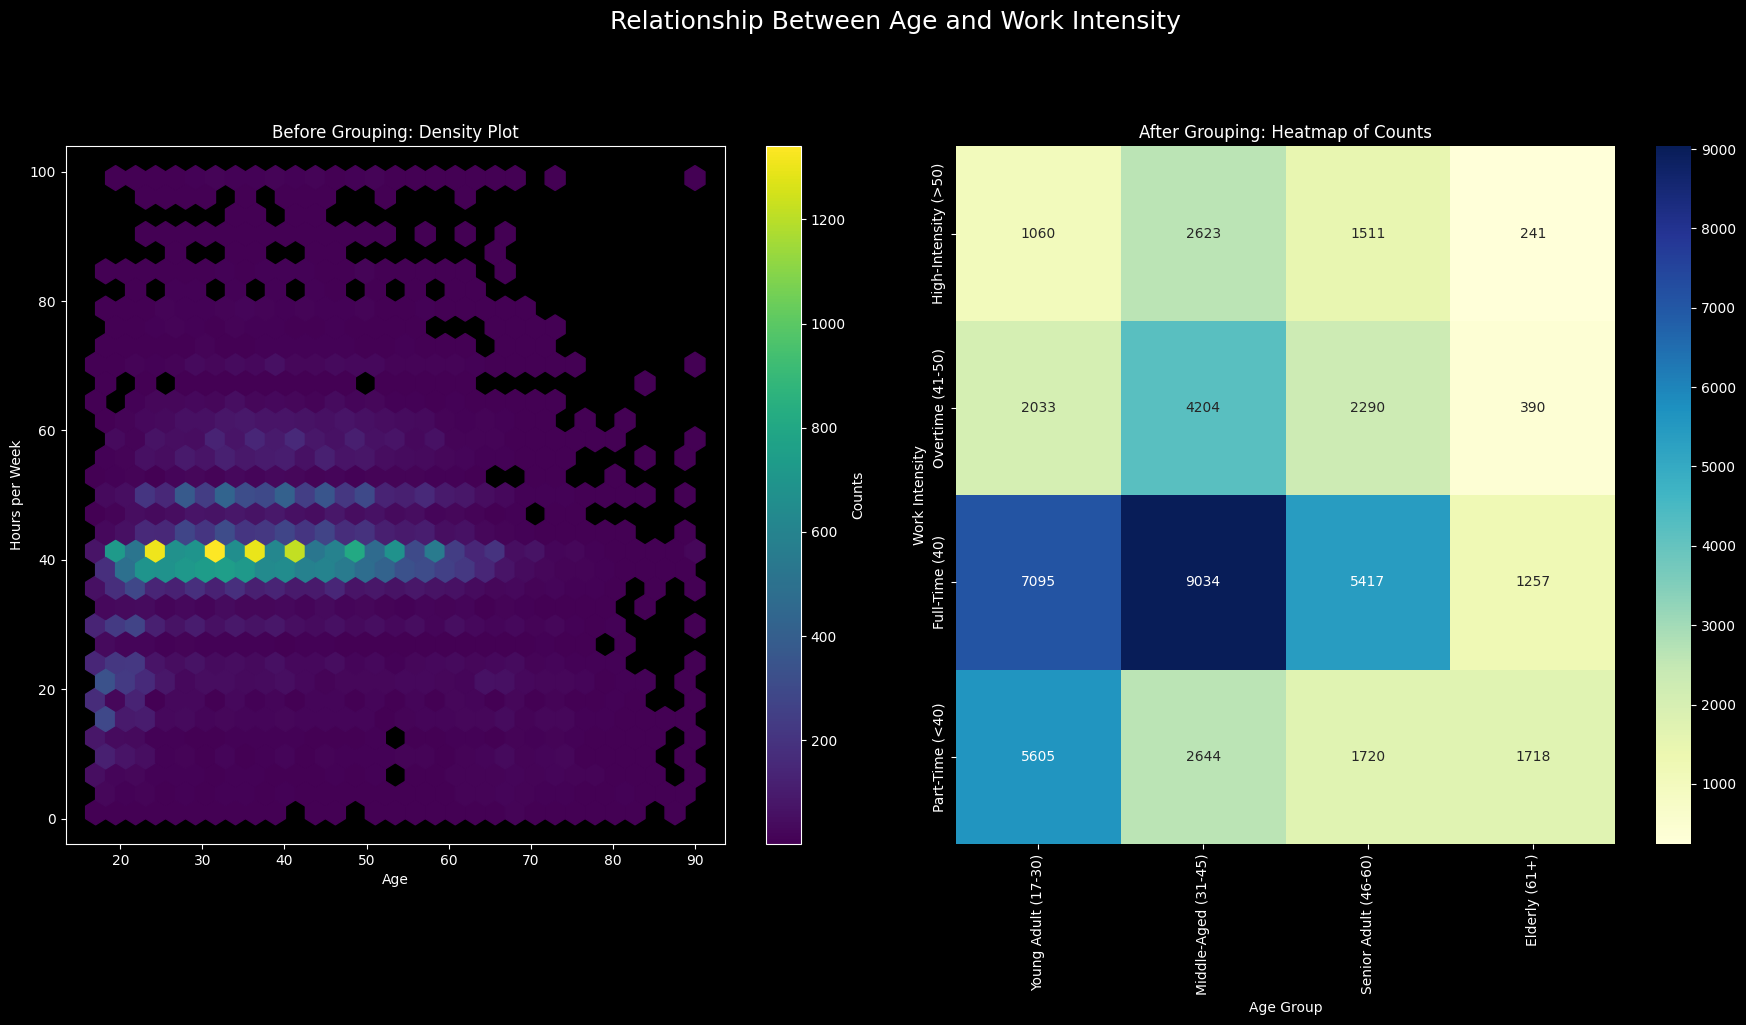


Pearson Correlation between Age and Hours_per_week: 0.0716


In [11]:
plt.figure(figsize=(18, 10))
plt.suptitle('Relationship Between Age and Work Intensity', fontsize=18, y=1.02)

# --- Before Grouping (Continuous Variables) ---
ax1 = plt.subplot(1, 2, 1)
hb = ax1.hexbin(df['Age'], df['Hours_per_week'], gridsize=30, cmap='viridis', mincnt=1)
ax1.set_title('Before Grouping: Density Plot')
ax1.set_xlabel('Age')
ax1.set_ylabel('Hours per Week')
cb = plt.colorbar(hb, ax=ax1)
cb.set_label('Counts')

# --- After Grouping (Categorical Variables) ---
ax2 = plt.subplot(1, 2, 2)
age_work_crosstab = pd.crosstab(df['Work_Intensity'], df['Age_Group'])
sns.heatmap(age_work_crosstab, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)
ax2.set_title('After Grouping: Heatmap of Counts')
ax2.set_ylabel('Work Intensity')
ax2.set_xlabel('Age Group')

ax2.invert_yaxis()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

correlation = df['Age'].corr(df['Hours_per_week'])
print(f"\nPearson Correlation between Age and Hours_per_week: {correlation:.4f}")

- There is an extremely dense band of people working exactly 40 hours per week, spanning from young adulthood to late middle-age, however, it's difficult to make precise comparisons. For example, it's hard to tell if "Young Adults" work more part-time hours than "Senior Adults".
- The heatmap on the right simplifies the relationship into discrete categories. The color intensity and the annotated numbers represent the count for each combination.
    - The largest single group is Middle-Aged (31-45) individuals working Full-Time (40), with over 9,000 people.
    - Young Adults (17-30) are the most likely group to work Part-Time.
    - Work intensity appears to peak in middle age. The Middle-Aged and Senior Adult groups have the highest counts for Overtime and High-Intensity work.
    - Elderly (61+) individuals are predominantly in the Part-Time category, which aligns with expectations of retirement and reduced work hours.

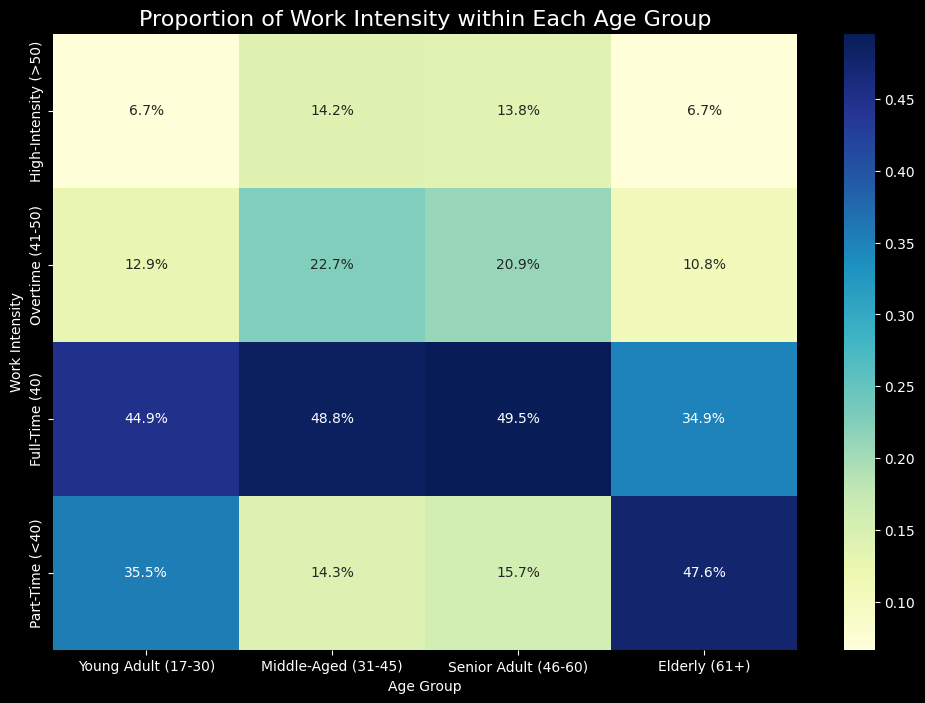

In [12]:
age_work_crosstab = pd.crosstab(df['Work_Intensity'], df['Age_Group'])

crosstab_normalized = age_work_crosstab.div(age_work_crosstab.sum(axis=0), axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_normalized, annot=True, fmt='.1%', cmap='YlGnBu')
plt.title('Proportion of Work Intensity within Each Age Group', fontsize=16)
plt.ylabel('Work Intensity')
plt.xlabel('Age Group')
plt.gca().invert_yaxis()
plt.show()

The main drawback is the loss of granularity. The Part-Time (<40) category, for instance, treats someone working 5 hours a week the same as someone working 35 hours. Similarly, the Age_Group 'Young Adult (17-30)' combines people just starting their careers with those who are well-established. The weak Pearson correlation failed to capture the pattern that work hours tend to increase from young adulthood, peak in middle age, and then decrease, a non-linear trend that the grouping helps to reveal.

# 3. Capital Gains/Losses and Group Performance

**Analyse the distributions of capital gain and loss, both overall and for non-zero values, and
report the proportion of individuals with any capital activity. Using your age and work intensity
groupings from the prior question, compare groups on average net capital (Capital Gain -
Capital Loss) and proportion with capital activity. Illustrate patterns using visualisations.
Discuss whether age or work intensity shows a stronger association with net capital, and how
grouping impacts interpretability.**

In [13]:
print("--- Overall Description of Capital Gain and Loss ---")
print(df[['Capital_Gain', 'Capital_Loss']].describe())

print("\n--- Description of Non-Zero Capital Gain ---")
print(df[df['Capital_Gain'] > 0]['Capital_Gain'].describe())

print("\n--- Description of Non-Zero Capital Loss ---")
print(df[df['Capital_Loss'] > 0]['Capital_Loss'].describe())

df['Has_Capital_Activity'] = (df['Capital_Gain'] > 0) | (df['Capital_Loss'] > 0)
proportion_with_activity = df['Has_Capital_Activity'].mean()
print(f"\nProportion of individuals with any capital activity: {proportion_with_activity:.2%}")

--- Overall Description of Capital Gain and Loss ---
       Capital_Gain  Capital_Loss
count  48842.000000  48842.000000
mean    1079.067626     87.502314
std     7452.019058    403.004552
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max    99999.000000   4356.000000

--- Description of Non-Zero Capital Gain ---
count     4035.000000
mean     13061.665675
std      22711.237412
min        114.000000
25%       3411.000000
50%       7298.000000
75%      13550.000000
max      99999.000000
Name: Capital_Gain, dtype: float64

--- Description of Non-Zero Capital Loss ---
count    2282.000000
mean     1872.825592
std       364.048529
min       155.000000
25%      1672.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: Capital_Loss, dtype: float64

Proportion of individuals with any capital activity: 12.93%


The initial analysis confirms that only about 13% of individuals have any capital activity, and the values for those who do are quite high and skewed. This makes direct analysis difficult and highlights the need for grouping.

In [14]:
df['Net_Capital'] = df['Capital_Gain'] - df['Capital_Loss']

# --- Analysis by Age Group ---
age_group_analysis = df.groupby('Age_Group', observed=True).agg(
    Average_Net_Capital=('Net_Capital', 'mean'),
    Proportion_with_Activity=('Has_Capital_Activity', 'mean')
).reset_index()

print("--- Capital Activity Analysis by Age Group ---")
print(age_group_analysis)


# --- Analysis by Work Intensity ---
work_intensity_analysis = df.groupby('Work_Intensity', observed=True).agg(
    Average_Net_Capital=('Net_Capital', 'mean'),
    Proportion_with_Activity=('Has_Capital_Activity', 'mean')
).reset_index()

print("\n--- Capital Activity Analysis by Work Intensity ---")
print(work_intensity_analysis)

--- Capital Activity Analysis by Age Group ---
              Age_Group  Average_Net_Capital  Proportion_with_Activity
0   Young Adult (17-30)           245.034762                  0.068195
1   Middle-Aged (31-45)          1065.982167                  0.145582
2  Senior Adult (46-60)          1743.274090                  0.167855
3         Elderly (61+)          1599.075707                  0.196894

--- Capital Activity Analysis by Work Intensity ---
         Work_Intensity  Average_Net_Capital  Proportion_with_Activity
0       Part-Time (<40)           463.452640                  0.087790
1        Full-Time (40)           668.774065                  0.116344
2      Overtime (41-50)          1540.409218                  0.179096
3  High-Intensity (>50)          2581.007912                  0.191536


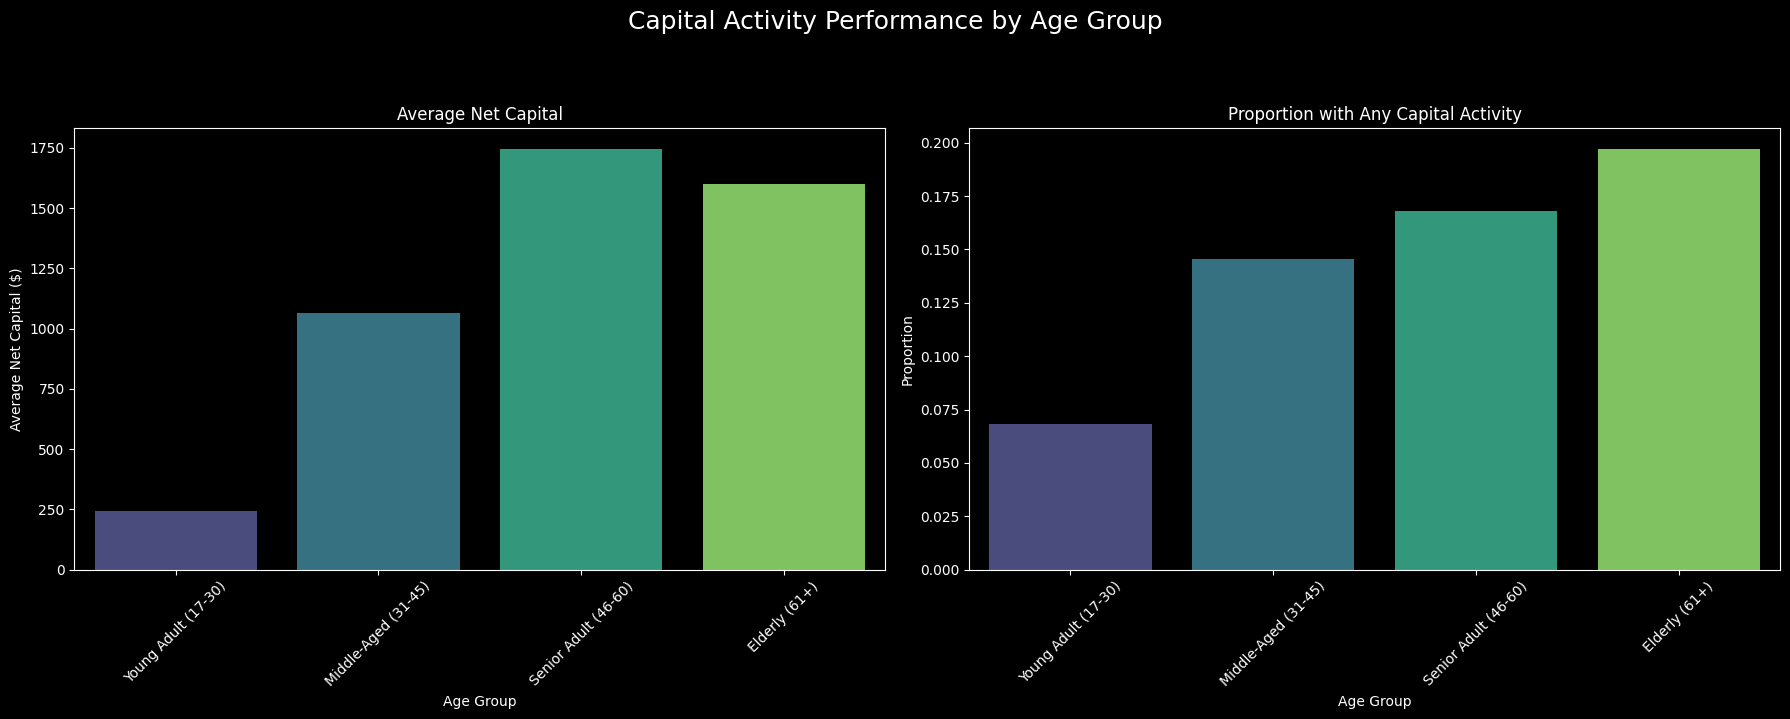

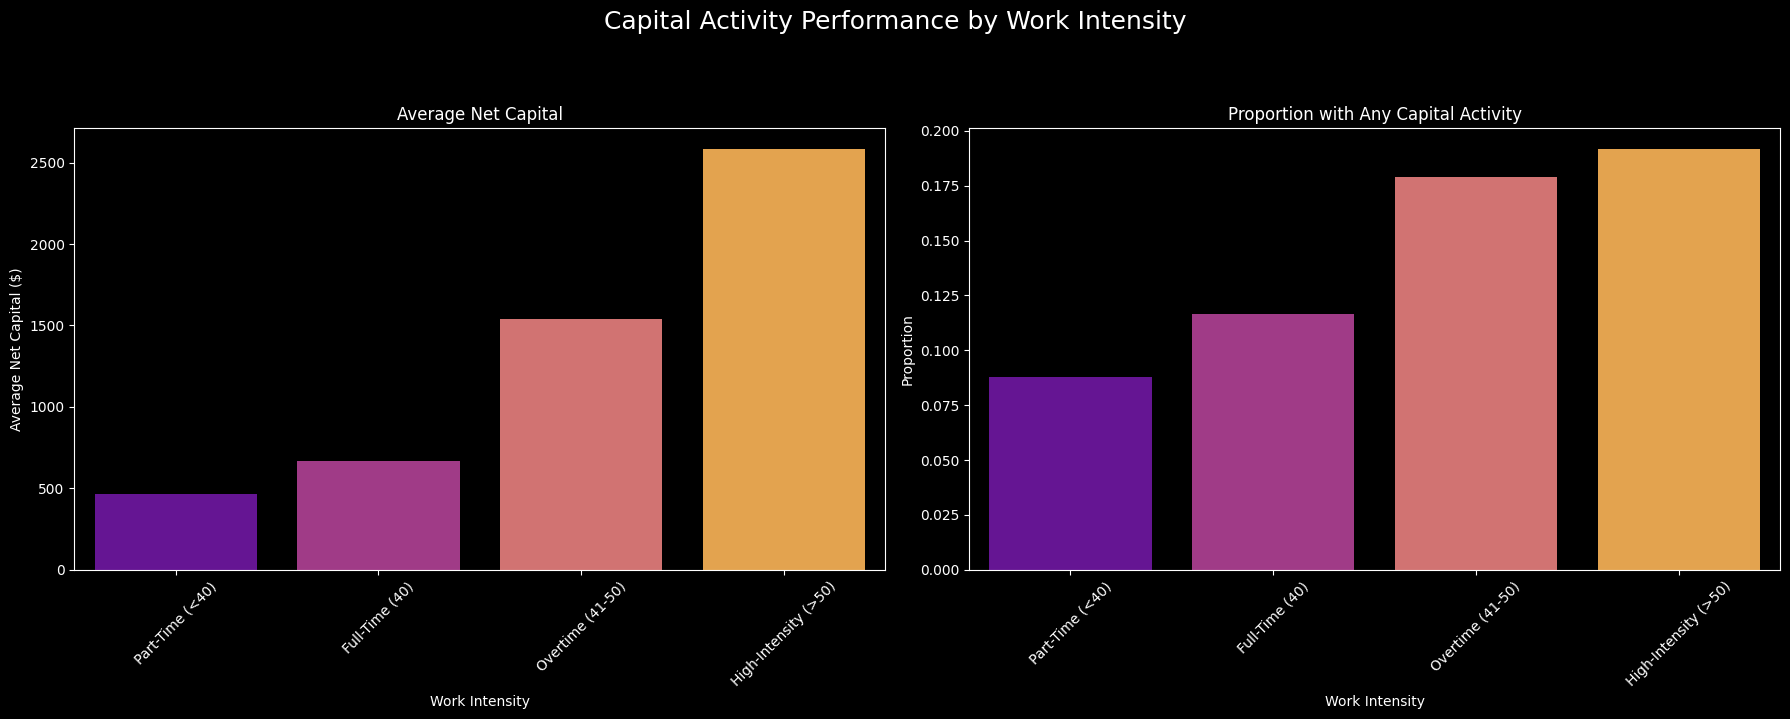

In [15]:
# --- Plotting for Age Group ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Capital Activity Performance by Age Group', fontsize=18, y=1.02)

# Average Net Capital by Age Group
sns.barplot(data=age_group_analysis, x='Age_Group', y='Average_Net_Capital', ax=axes[0], palette='viridis', hue='Age_Group', legend=False)
axes[0].set_title('Average Net Capital')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Average Net Capital ($)')
axes[0].tick_params(axis='x', rotation=45)

# Proportion with Capital Activity by Age Group
sns.barplot(data=age_group_analysis, x='Age_Group', y='Proportion_with_Activity', ax=axes[1], palette='viridis', hue='Age_Group', legend=False)
axes[1].set_title('Proportion with Any Capital Activity')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Proportion')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# --- Plotting for Work Intensity ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Capital Activity Performance by Work Intensity', fontsize=18, y=1.02)

# Average Net Capital by Work Intensity
sns.barplot(data=work_intensity_analysis, x='Work_Intensity', y='Average_Net_Capital', ax=axes[0], palette='plasma', hue='Work_Intensity', legend=False)
axes[0].set_title('Average Net Capital')
axes[0].set_xlabel('Work Intensity')
axes[0].set_ylabel('Average Net Capital ($)')
axes[0].tick_params(axis='x', rotation=45)

# Proportion with Capital Activity by Work Intensity
sns.barplot(data=work_intensity_analysis, x='Work_Intensity', y='Proportion_with_Activity', ax=axes[1], palette='plasma', hue='Work_Intensity', legend=False)
axes[1].set_title('Proportion with Any Capital Activity')
axes[1].set_xlabel('Work Intensity')
axes[1].set_ylabel('Proportion')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])

- **Capital Activity by Age Group:**
    - **Average Net Capital:** There is a clear upward trend from "Young Adult" to "Senior Adult," peaking at over $1,700 for the 46-60 age group. This suggests that people accumulate more capital as they progress through their careers. There is a slight dip for the "Elderly" group, which might indicate they are drawing down on their investments in retirement.
    - **Proportion with Activity:** This shows a monotonically increasing trend. The likelihood of having any capital activity increases steadily with each age group, from just 6.8% for Young Adults to nearly 20% for the Elderly.

- **Capital Activity by Work Intensity:**
    - **Average Net Capital:** This shows a monotonic increase with work intensity. "High-Intensity" workers have an average net capital over 5 times higher than "Part-Time" workers.
    - **Proportion with Activity:** This also shows a monotonically increasing trend. The more hours a person works, the more likely they are to have capital activity, increasing from 8.8% for Part-Time to over 19% for High-Intensity workers.

# 4. Final Dataset Refinement and Structure
**Summarise the final refined dataset structure, noting newly created, transformed, categorised,
or grouped features, and any that were removed. Compare category counts before and after
grouping for key variables, highlight changes in missing values, and describe how these refinements
improve interpretability and readiness for modelling.**

### Features Removed:

- `fnlwgt`: This column, representing the "final weight" assigned by the census bureau, was removed. It is an identifier related to the sampling process and holds no predictive value for individual characteristics, making it irrelevant for this analysis.

### Data Cleaning & Type Correction:
- `Age`: Corrected from object type to int. Rows with non-numeric age values were identified as problematic and dropped entirely.
- `Target`: Cleaned by stripping leading/trailing whitespace and removing trailing periods (e.g., '>50K.' became '>50K'), ensuring consistency with only two unique values: '>50K' and '<=50K'.
- **Other Numerical Columns:** Education_Num, Capital_Gain, Capital_Loss, and Hours_per_week were converted from float64 to int for memory efficiency and appropriate representation.
- **All Object Columns:** All columns with text data had leading/trailing whitespace removed to prevent inconsistencies (e.g., ' Male' vs. 'Male').

### Newly Created & Grouped Features
- **Education_Group:** The original 16 Education levels were mapped into 6 broader, ordinal categories: Compulsory Education, High School, Some College, Associate, Bachelors, and Advanced Degree. This reduces dimensionality and creates a clear educational progression.
- **Age_Group:** The continuous Age variable was binned into 4 distinct life-stage categories: Young Adult (17-30), Middle-Aged (31-45), Senior Adult (46-60), and Elderly (61+).
- **Work_Intensity:** The Hours_per_week variable was grouped into 4 meaningful work categories: Part-Time (<40), Full-Time (40), Overtime (41-50), and High-Intensity (>50).
- **Has_Capital_Activity:** A boolean feature created to be True if either Capital_Gain or Capital_Loss is greater than zero. This simplifies the sparse capital features into a single, clear indicator of investment activity.
- **Net_Capital:** Calculated as Capital_Gain - Capital_Loss. This single feature captures the overall financial impact of capital activities, providing a stronger signal than the two separate, sparse columns.

### Improvements
- Grouping reduces noise and complexity. Instead of comparing 16 education levels, we can now compare 6 ordered groups, making trends (like the relationship between education and income) much easier to visualize and understand.
- The creation of groups like Age_Group and Work_Intensity allowed for the discovery of non-linear relationships (e.g., work hours peaking in middle age) that were not apparent from simple correlations on the raw data.
- **No Missing Data:** The dataset is now complete and can be used directly by most machine learning algorithms without causing errors.
- **Reduced Dimensionality:** Consolidating categories (e.g., Education to Education_Group) helps prevent the "curse of dimensionality." For models like decision trees, having fewer, more populated categories can lead to more robust and generalizable splits.
- **Stronger Predictive Features:** Features like Net_Capital and Has_Capital_Activity are likely to be more powerful predictors than the original sparse Capital_Gain and Capital_Loss columns. They concentrate the predictive signal into a more usable form.
- **Data Integrity:** Correcting data types and cleaning text values ensures that all operations, from statistical calculations to model training, are performed correctly and without unexpected errors.

In [16]:
final_output_filename = 'final_dataset_1.csv'
df.to_csv(final_output_filename, index=False)
print(f"\nFinal dataset saved to {final_output_filename}")


Final dataset saved to final_dataset_1.csv
